In [1]:
# The script should operate from the repository's parent directory.
import os
print(os.getcwd())
os.chdir('../..')
print(os.getcwd())

/Users/Tom/Documents/projects/pinging/spiking_visnet/networks/ht2005_thalamus+primary
/Users/Tom/Documents/projects/pinging/spiking_visnet


In [2]:
import spiking_visnet.plot as pl
from spiking_visnet.utils.sparsify import save_as_sparse
from spiking_visnet.analysis import utils as an_utils
from spiking_visnet.analysis import input_encoding as an_inp
from spiking_visnet.analysis import activity as an_activity
from spiking_visnet import save


In [3]:
output_dir = 'networks/ht2005_thalamus+primary/output_spontaneous+grating'

### Activity movies

In [5]:
#Plot stim
session_name = 'vertical_grating'

# Load first filter of full_stim
stim = save.load_session_stim(output_dir, session_name)
stim = stim[:,0,:40,:40]

p = pl.init()
pl.animate(p, stim, fps=100)

Loading BokehJS ...

(2000, 40, 40)


/Users/Tom/.virtualenvs/pinging/lib/python3.6/site-packages/numpy/core/numeric.py:2604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


KeyboardInterrupt: 

In [6]:
#plot input layer
layer = 'retina'
pop = 'parrot_neuron'

arr = save.load_activity(output_dir, layer, pop)
p = pl.init()
pl.animate(p, arr[500:], fps=100)

Loading BokehJS ...

(3000, 40, 40)


/Users/Tom/.virtualenvs/pinging/lib/python3.6/site-packages/numpy/core/numeric.py:2604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


KeyboardInterrupt: 

In [ ]:
#plot exc layer
layer = 'Vp_L23_vertical'
pop = 'Vp_exc'
variable = 'spikes'
arr = save.load_activity(output_dir, layer, pop)
# view.plot(arr, stop=T, static=True)
p = pl.init()
pl.animate(p, arr[500:], fps=100)

In [ ]:

#plot exc layer
layer = 'Vp_L23_horizontal'
pop = 'Vp_exc'
variable = 'spikes'
arr = save.load_activity(output_dir, layer, pop)
# view.plot(arr, stop=T, static=True)
p = pl.init()
pl.animate(p, arr[500:], fps=100)

In [ ]:
#plot inh layer
layer = 'Vp_L23_vertical'
pop = 'Vp_inh'
variable = 'spikes'
arr = save.load_activity(output_dir, layer, pop)
# view.plot(arr, stop=T, static=True)
p = pl.init()
pl.animate(p, arr, fps=100)

In [ ]:
#plot inh layer
layer = 'Vp_L4_vertical'
pop = 'Vp_exc'
variable = 'spikes'
arr = save.load_activity(output_dir, layer, pop)
# view.plot(arr, stop=T, static=True)
p = pl.init()
pl.animate(p, arr, fps=100)

### Plot mean activity

In [4]:
# Define which session we plot and analyse.
# The data considered is the data from the start of the earliest session to the end of the latest
# plot_sessions = ['warmup', 'vertical_grating']
# rate_sessions = ['vertical_grating']
# cv_sessions = ['vertical_grating']

plot_sessions = ['spontaneous', 'vertical_grating']
rate_sessions = ['spontaneous', 'vertical_grating']
# cv_sessions = ['spontaneous']
# show_rate=True

In [5]:
# Get times
session_times = save.load_session_times(output_dir)
def union_session_times(sessions):
    """Return range between earliest and latest time of the sessions in the list"""
    session_range_list = [session_times[session] for session in sessions]
    return range(min([min(times) for times in session_range_list]),
                 max([max(times) for times in session_range_list]) + 1)

plot_period = union_session_times(plot_sessions)
rate_period = union_session_times(rate_sessions)
# cv_period = union_session_times(cv_sessions)

Activity raster plot:  spikes
Layer:  retina , population:  parrot_neuron


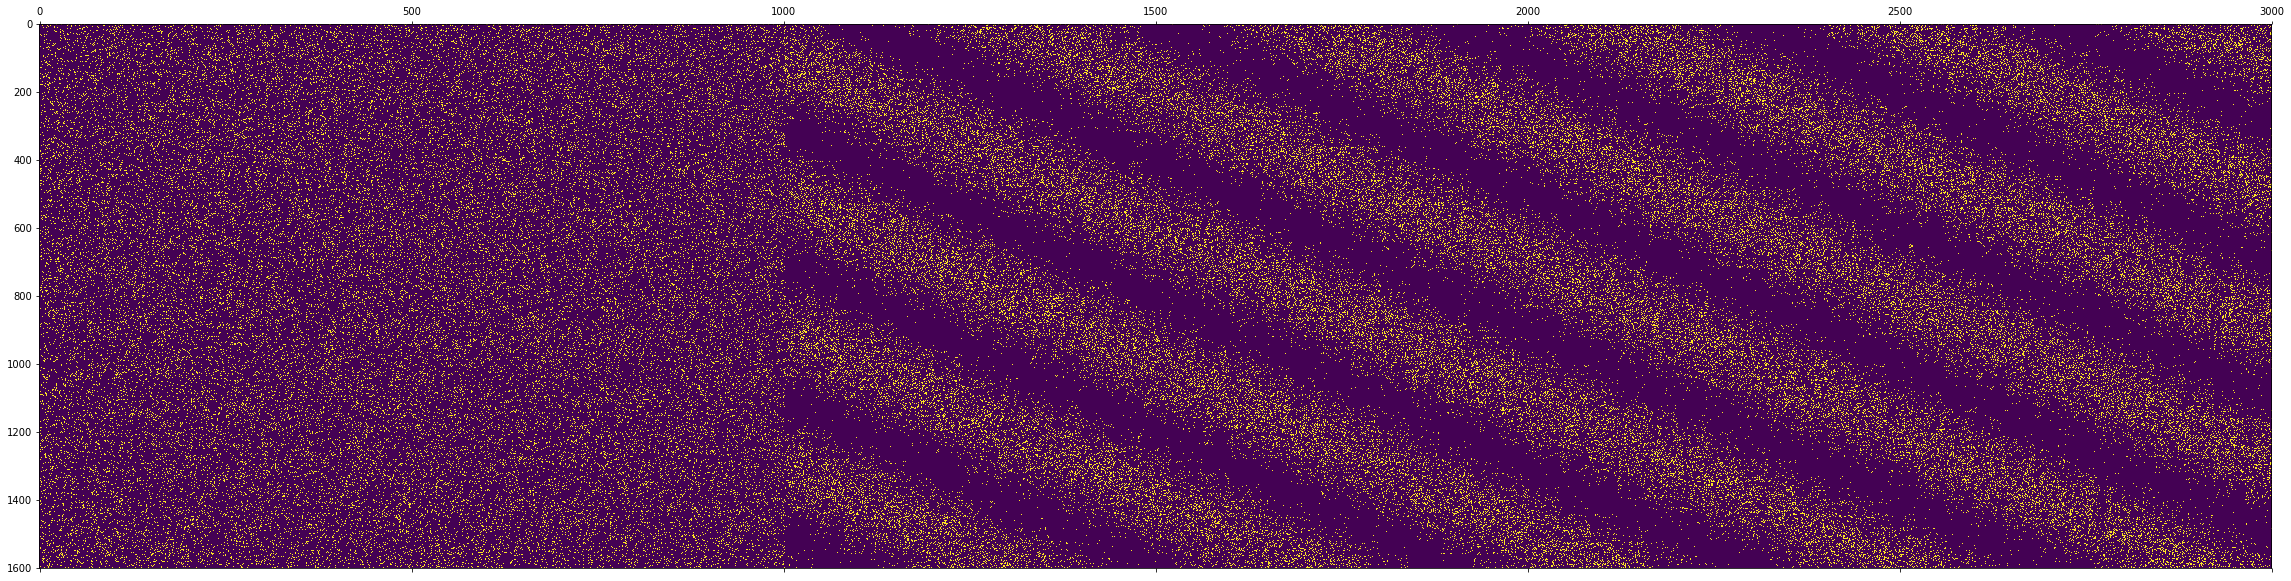

Firing rate:
mean:  93.8377083333
min:  77.0
max:  111.333333333 



In [12]:
# Retina
layer = 'retina'
pop = 'parrot_neuron'
variable='spikes'
activity = an_utils.load_activity(layer, pop, output_dir)

pl.show_layer_summary(activity, variable, layer, pop, plot_period=plot_period, rate_period=rate_period, plot_cols=None)

Activity raster plot:  spikes
Layer:  Tp_layer , population:  Tp_exc


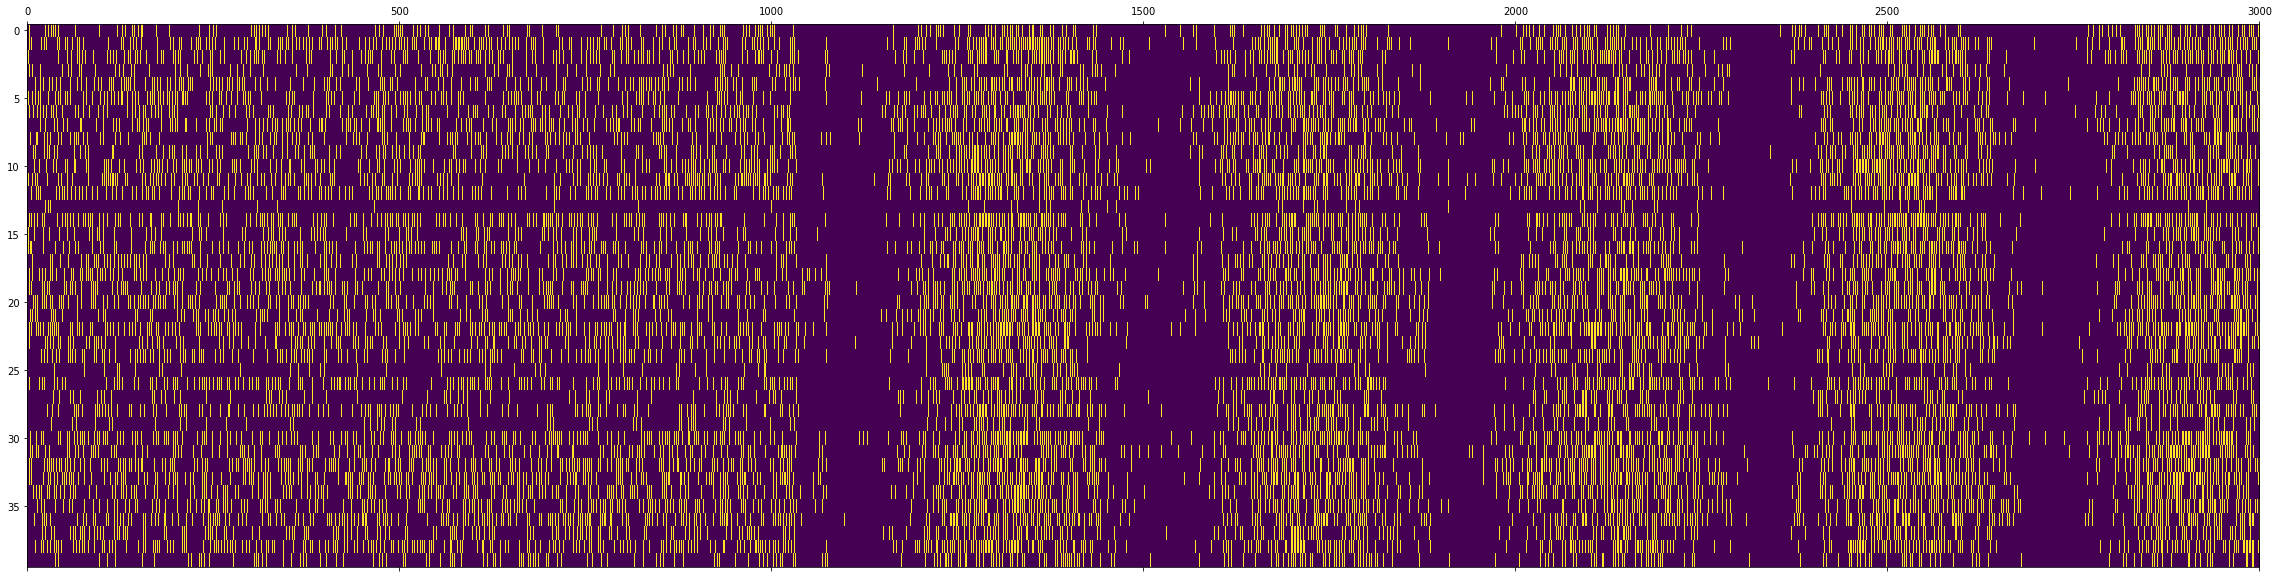

Firing rate:
mean:  153.859791667
min:  0.333333333333
max:  250.333333333 



In [13]:
# Thalamus: Tp exc, spikes
layer = 'Tp_layer'
pop = 'Tp_exc'
variable='spikes'
activity = an_utils.load_activity(layer, pop, output_dir, variable=variable)

pl.show_layer_summary(activity, variable, layer, pop, plot_period=plot_period, rate_period=rate_period, plot_cols=[0])

Activity raster plot:  V_m
Layer:  Vp_L4_vertical , population:  Vp_exc


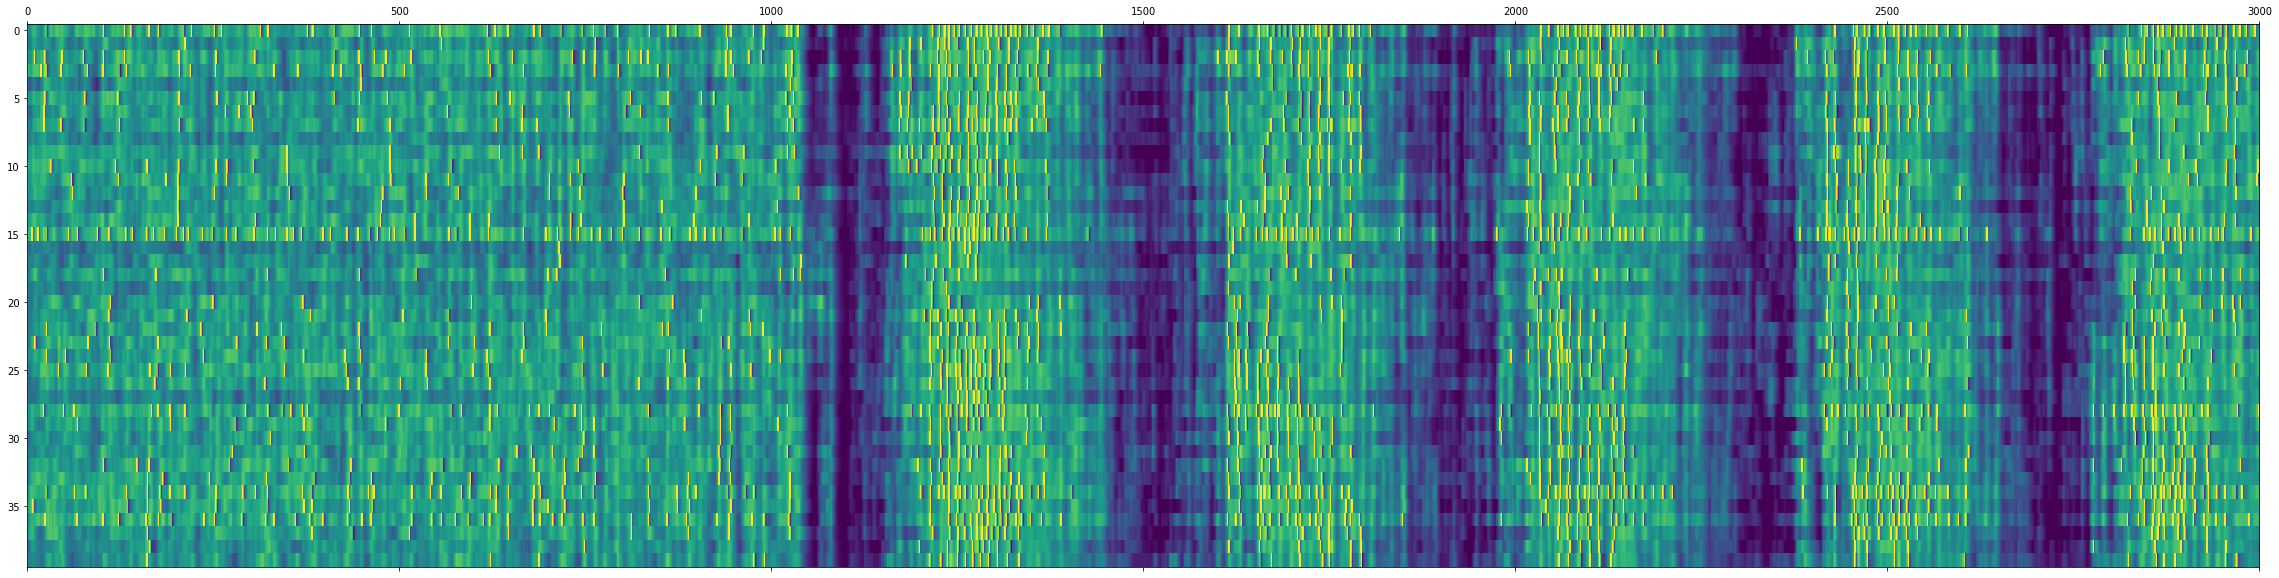

Activity raster plot:  spikes
Layer:  Vp_L4_vertical , population:  Vp_exc


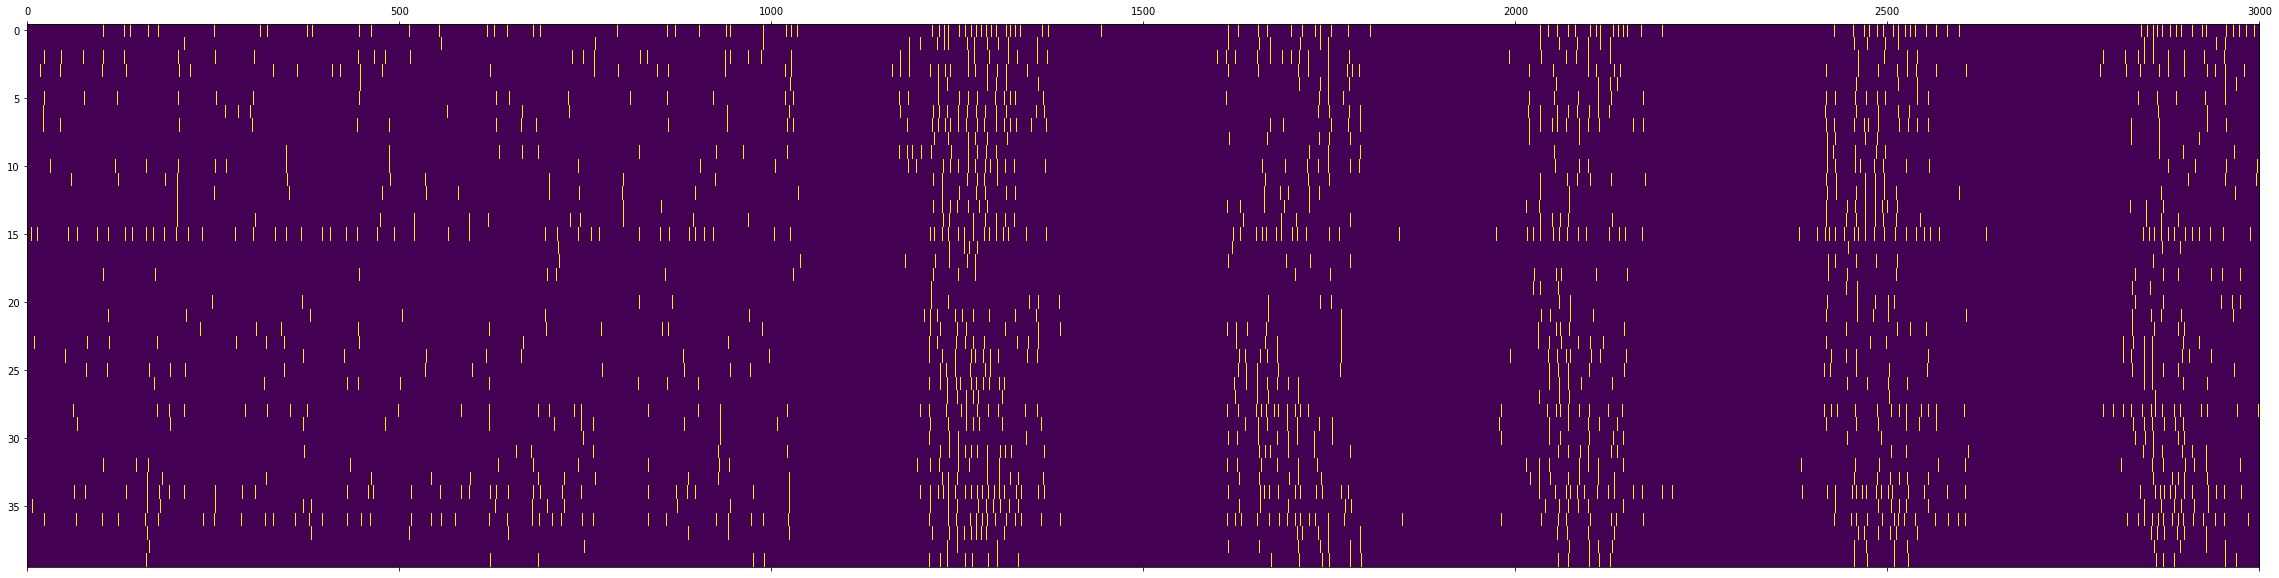

Firing rate:
mean:  19.5395833333
min:  0.0
max:  80.6666666667 



In [14]:
# Vp L4 exc: vertical
layer = 'Vp_L4_vertical'
pop = 'Vp_exc'

# V_m
variable='V_m'
activity = an_utils.load_activity(layer, pop, output_dir, variable=variable)
pl.show_layer_summary(activity, variable, layer, pop, plot_period=plot_period, rate_period=rate_period, plot_cols=[0])
# Spikes
variable='spikes'
activity = an_utils.load_activity(layer, pop, output_dir, variable=variable)
pl.show_layer_summary(activity, variable, layer, pop, plot_period=plot_period, rate_period=rate_period, plot_cols=[0])

Activity raster plot:  V_m
Layer:  Vp_L4_horizontal , population:  Vp_exc


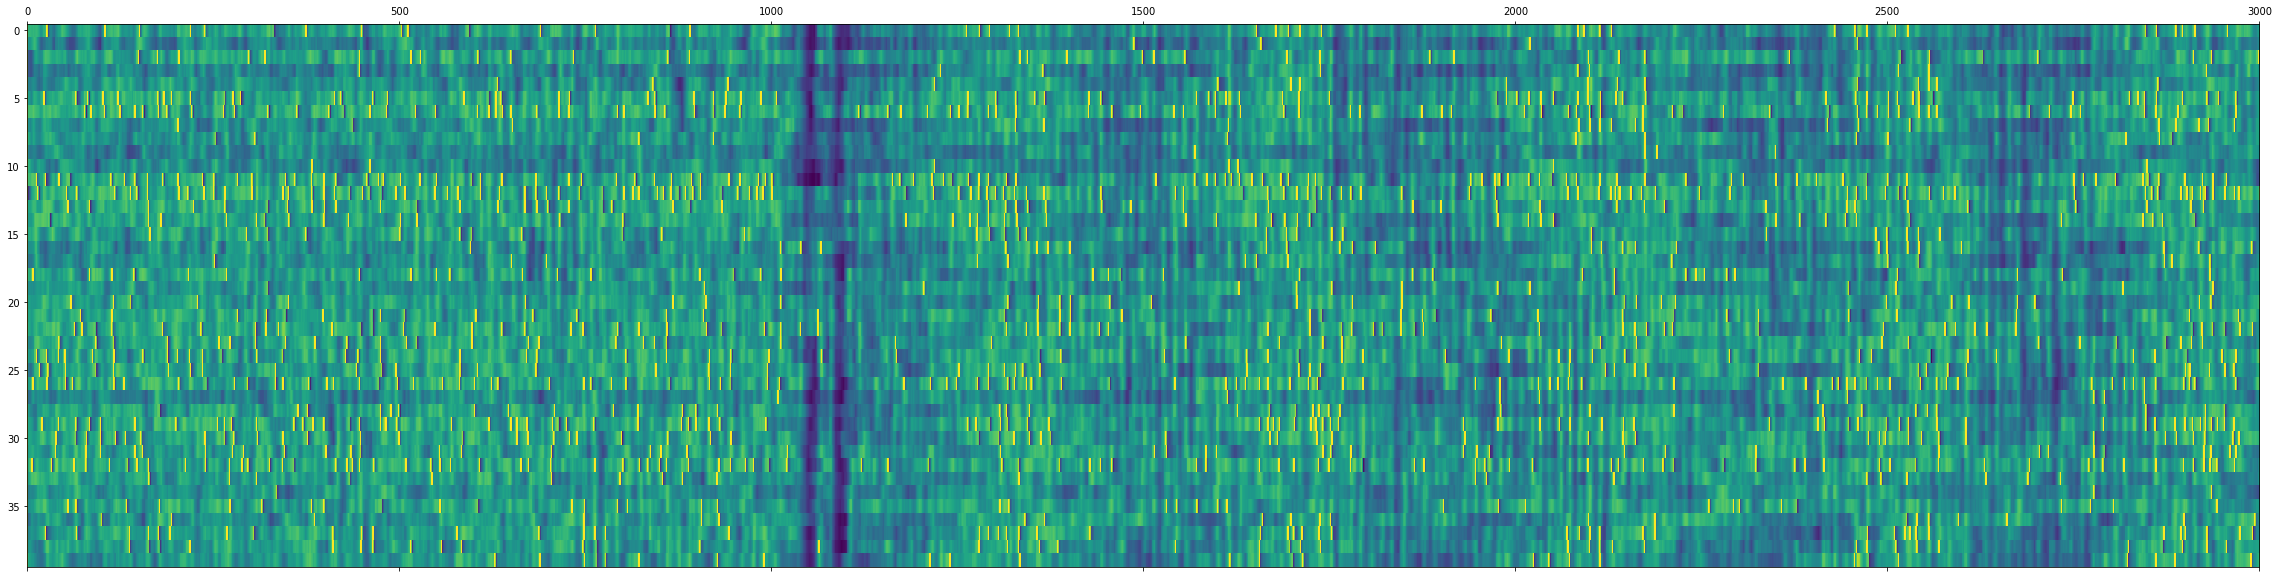

Activity raster plot:  spikes
Layer:  Vp_L4_horizontal , population:  Vp_exc


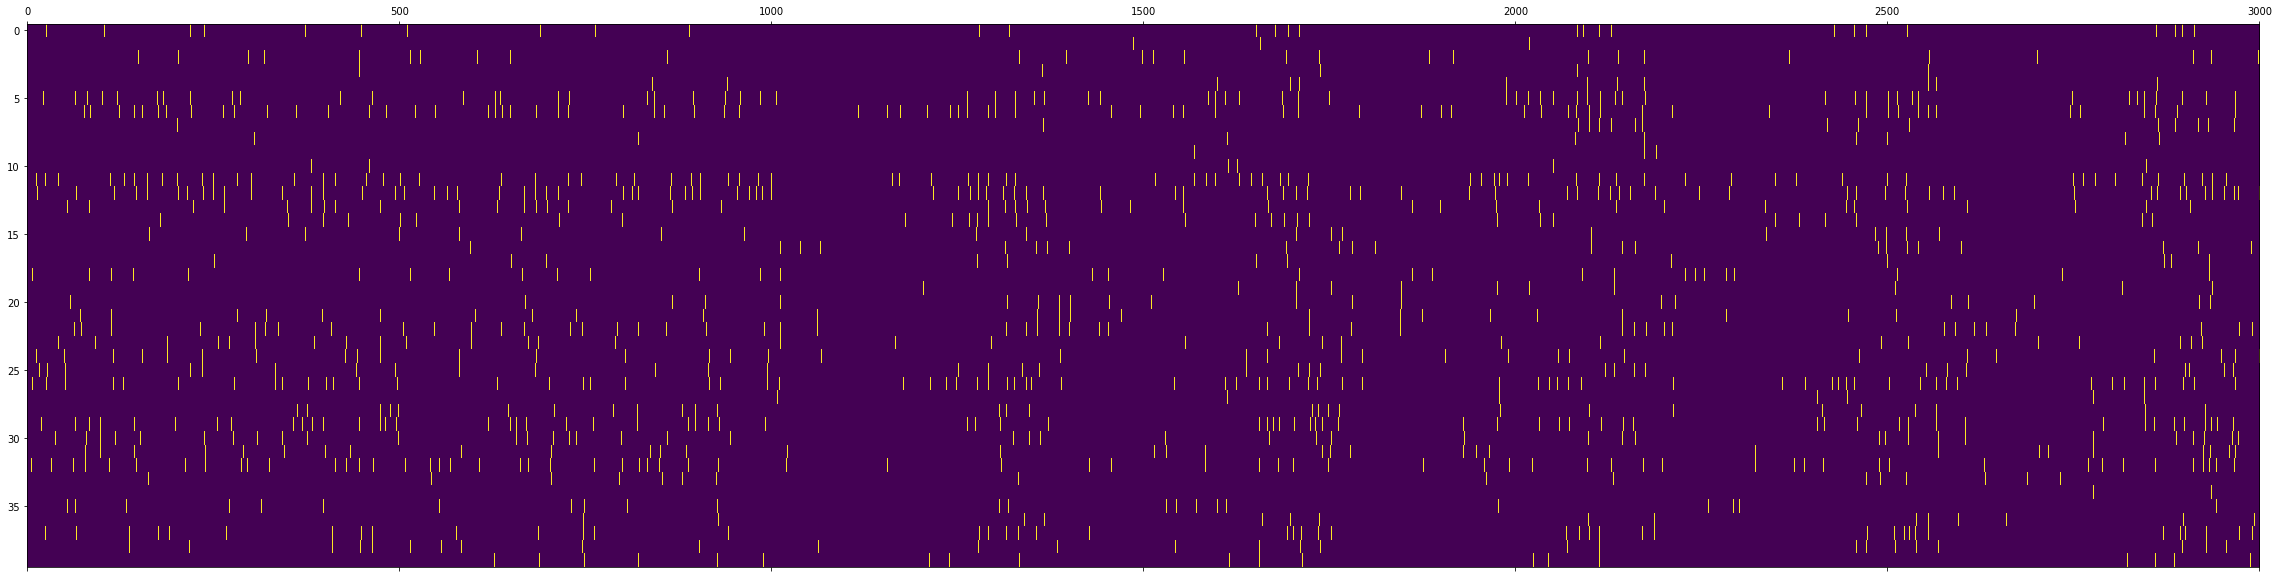

Firing rate:
mean:  11.985625
min:  0.0
max:  64.0 



In [15]:
# Vp L4 exc: horizontal
layer = 'Vp_L4_horizontal'
pop = 'Vp_exc'

# V_m
variable='V_m'
activity = an_utils.load_activity(layer, pop, output_dir, variable=variable)
pl.show_layer_summary(activity, variable, layer, pop, plot_period=plot_period, rate_period=rate_period, plot_cols=[0])
# Spikes
variable='spikes'
activity = an_utils.load_activity(layer, pop, output_dir, variable=variable)
pl.show_layer_summary(activity, variable, layer, pop, plot_period=plot_period, rate_period=rate_period, plot_cols=[0])

Vp_L23_vertical   Vp_exc 

Activity raster plot:  V_m
Layer:  Vp_L23_vertical , population:  Vp_exc


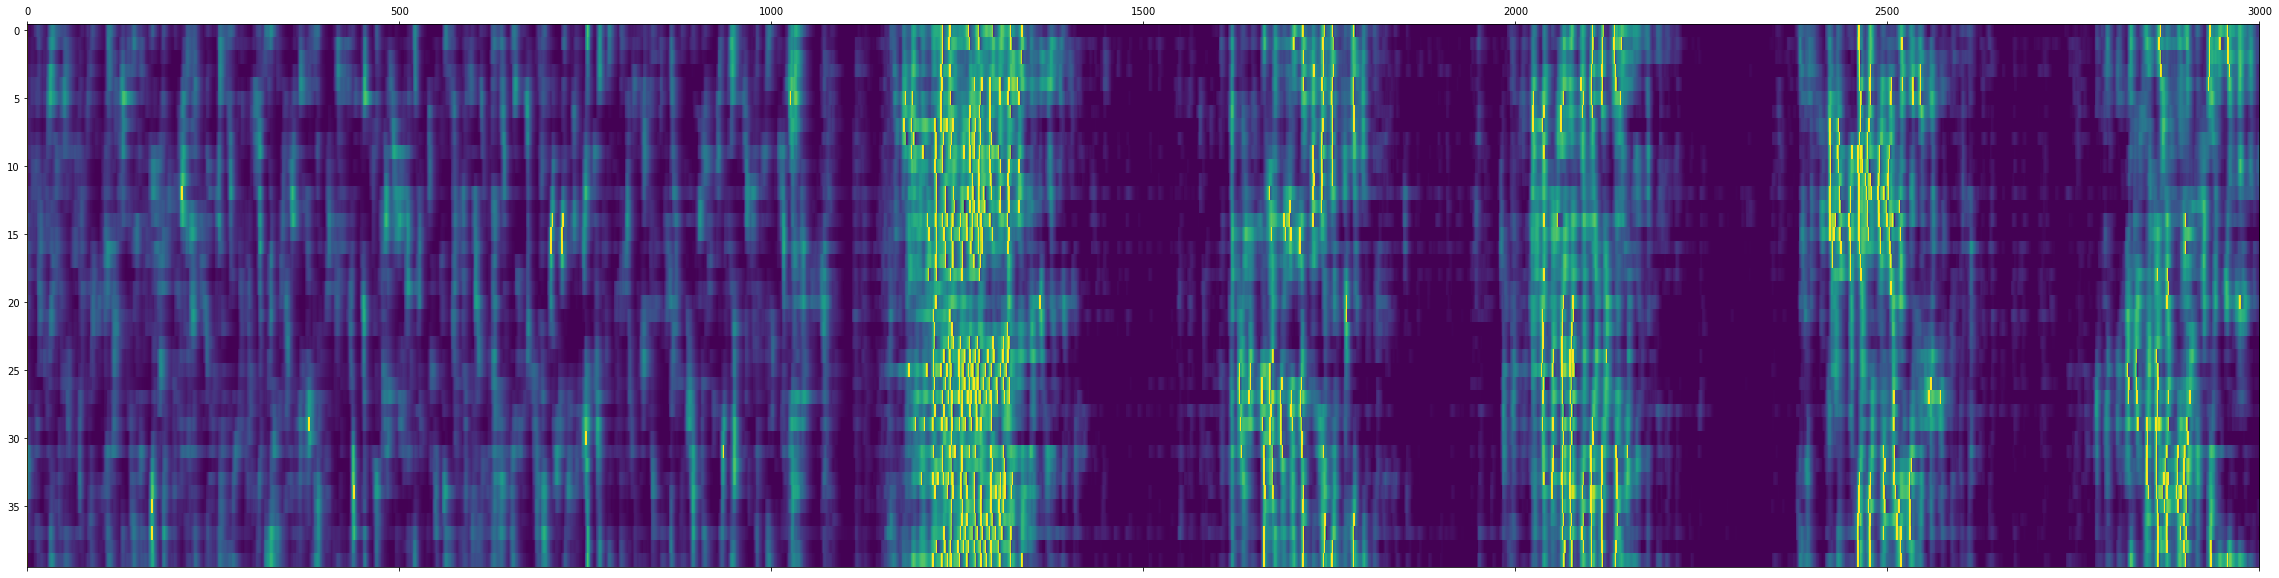

Activity raster plot:  spikes
Layer:  Vp_L23_vertical , population:  Vp_exc


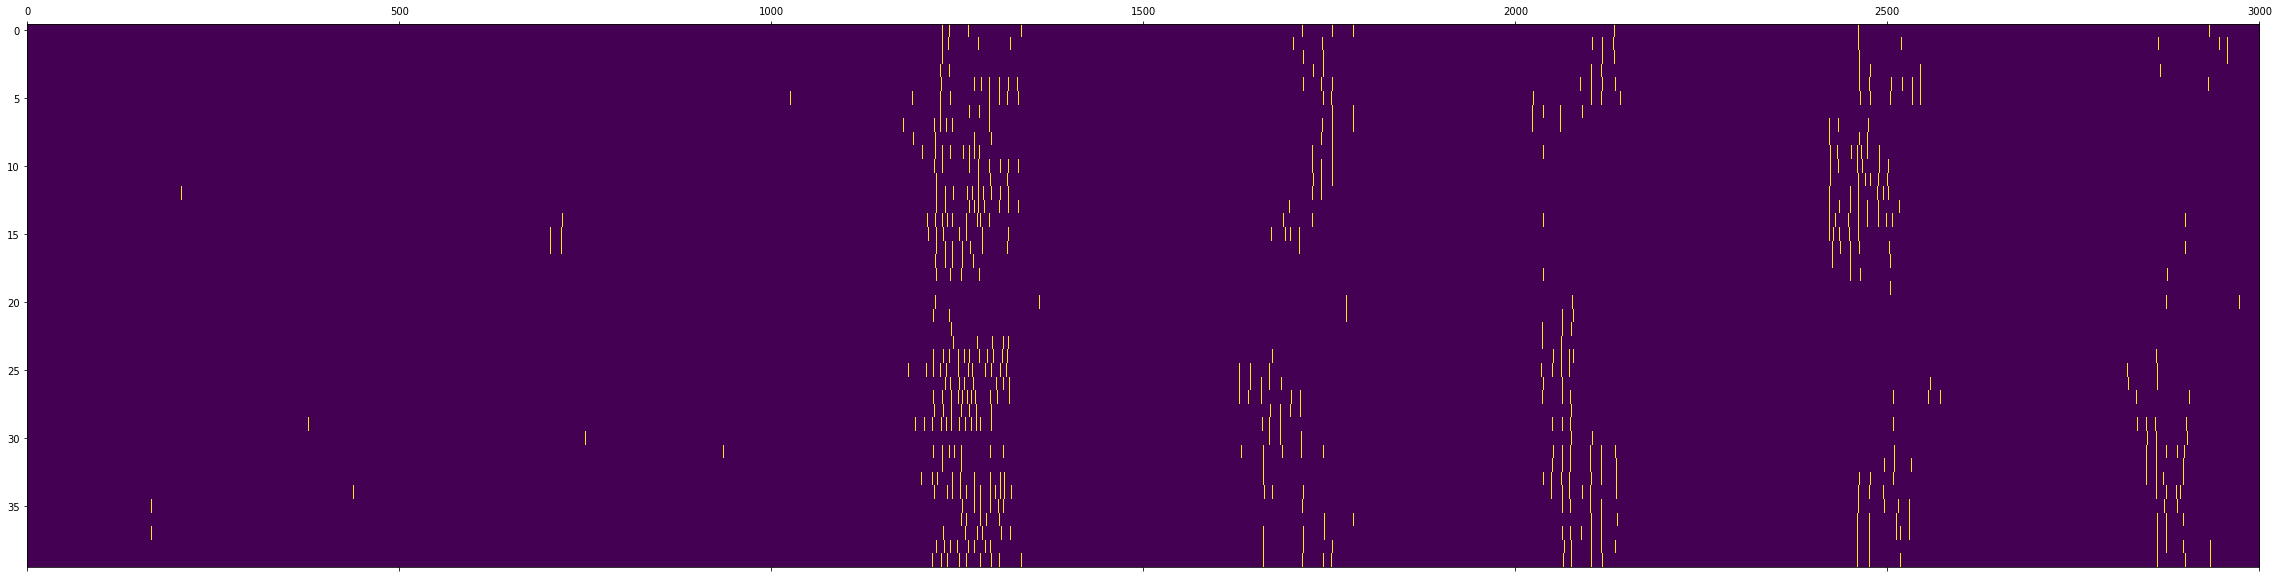

In [19]:
# Vp L23 exc: vertical
layer = 'Vp_L23_vertical'
pop = 'Vp_exc'


print(layer, ' ', pop, '\n')
# V_m
variable='V_m'
activity = an_utils.load_activity(layer, pop, output_dir, variable=variable)
pl.show_layer_summary(activity, variable, layer, pop, plot_period=plot_period, rate_period=rate_period, plot_cols=[0])
# Spikes
variable='spikes'
activity = an_utils.load_activity(layer, pop, output_dir, variable=variable)
pl.show_layer_summary(activity, variable, layer, pop, plot_period=plot_period, rate_period=rate_period, plot_cols=[0],
                      show_rate=False)

Activity raster plot:  spikes


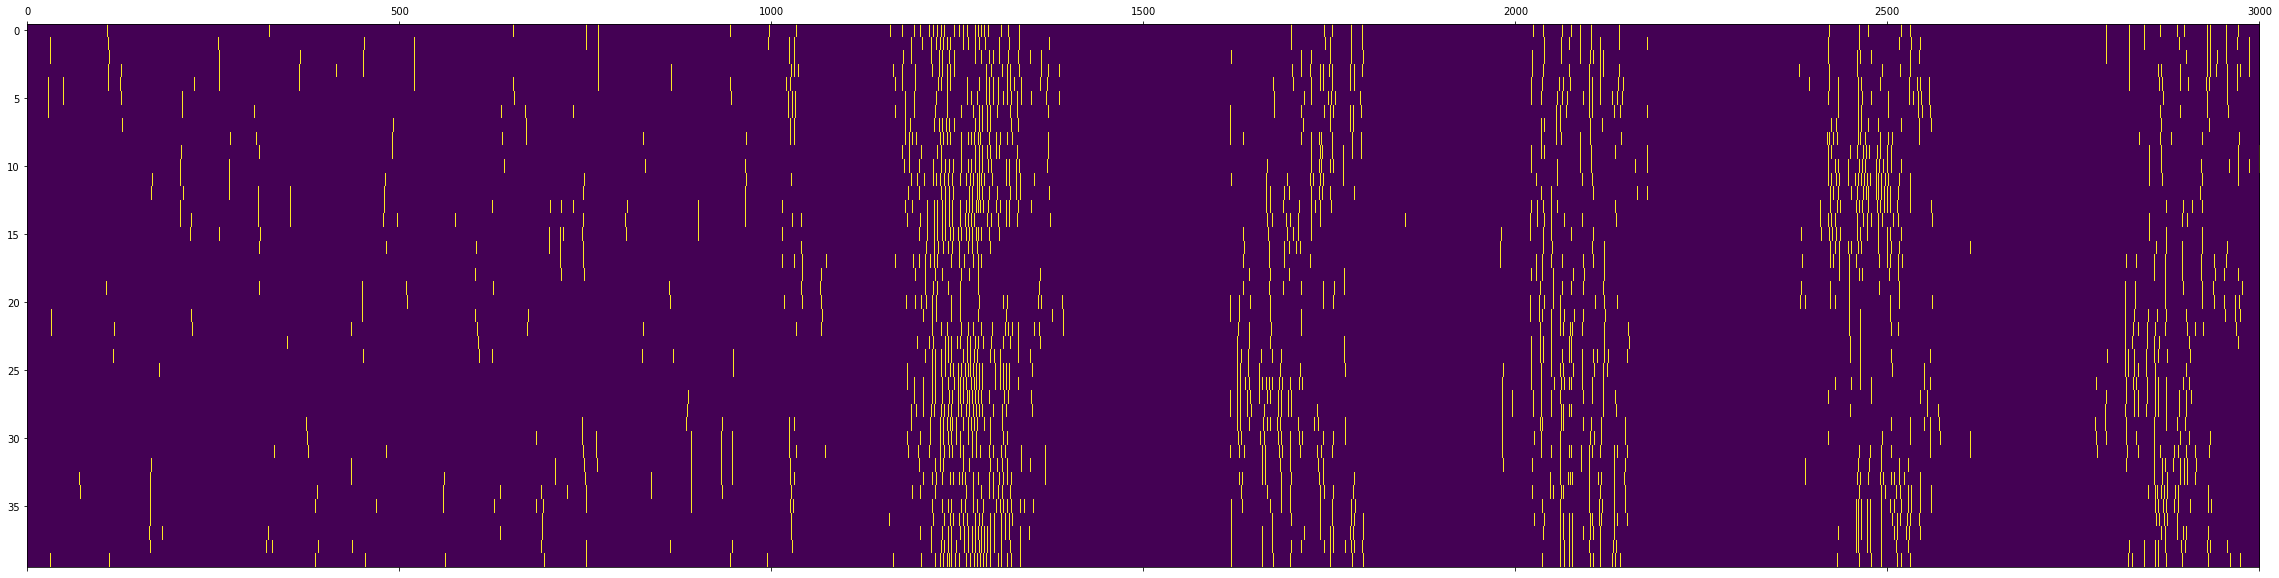

Firing rate:
mean:  25.5977083333
min:  9.0
max:  39.6666666667 



In [9]:

# Vp L23 inh: vertical
layer = 'Vp_L23_vertical'
pop = 'Vp_inh'

# Spikes
variable='spikes'
activity = an_utils.load_activity(layer, pop, output_dir, variable=variable)
pl.show_layer_summary(activity, variable, layer, pop, plot_period=plot_period, rate_period=rate_period, plot_cols=[0])

Activity raster plot:  V_m


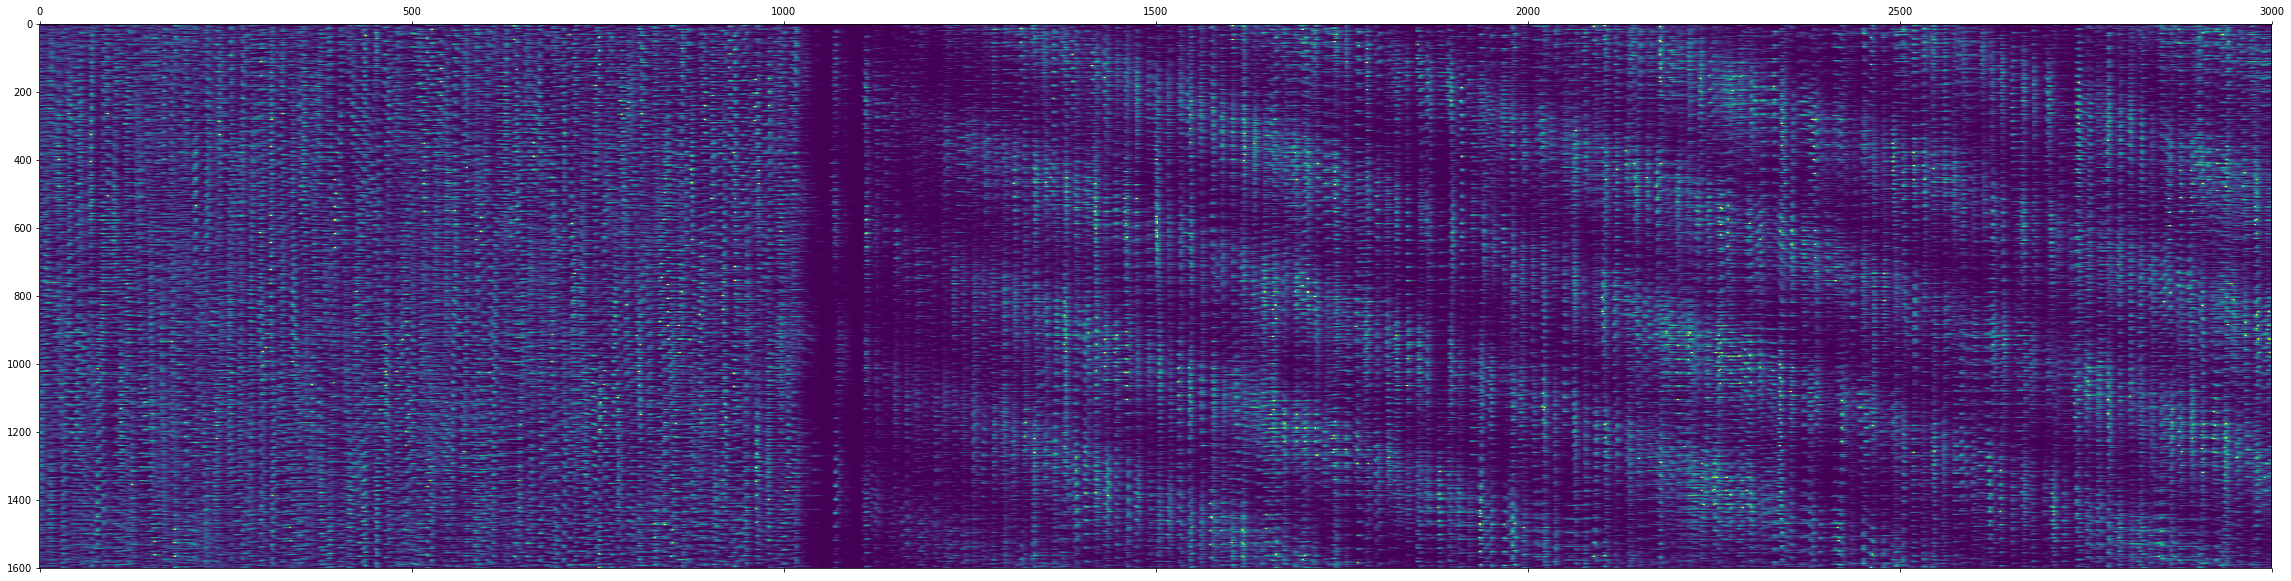

Activity raster plot:  spikes


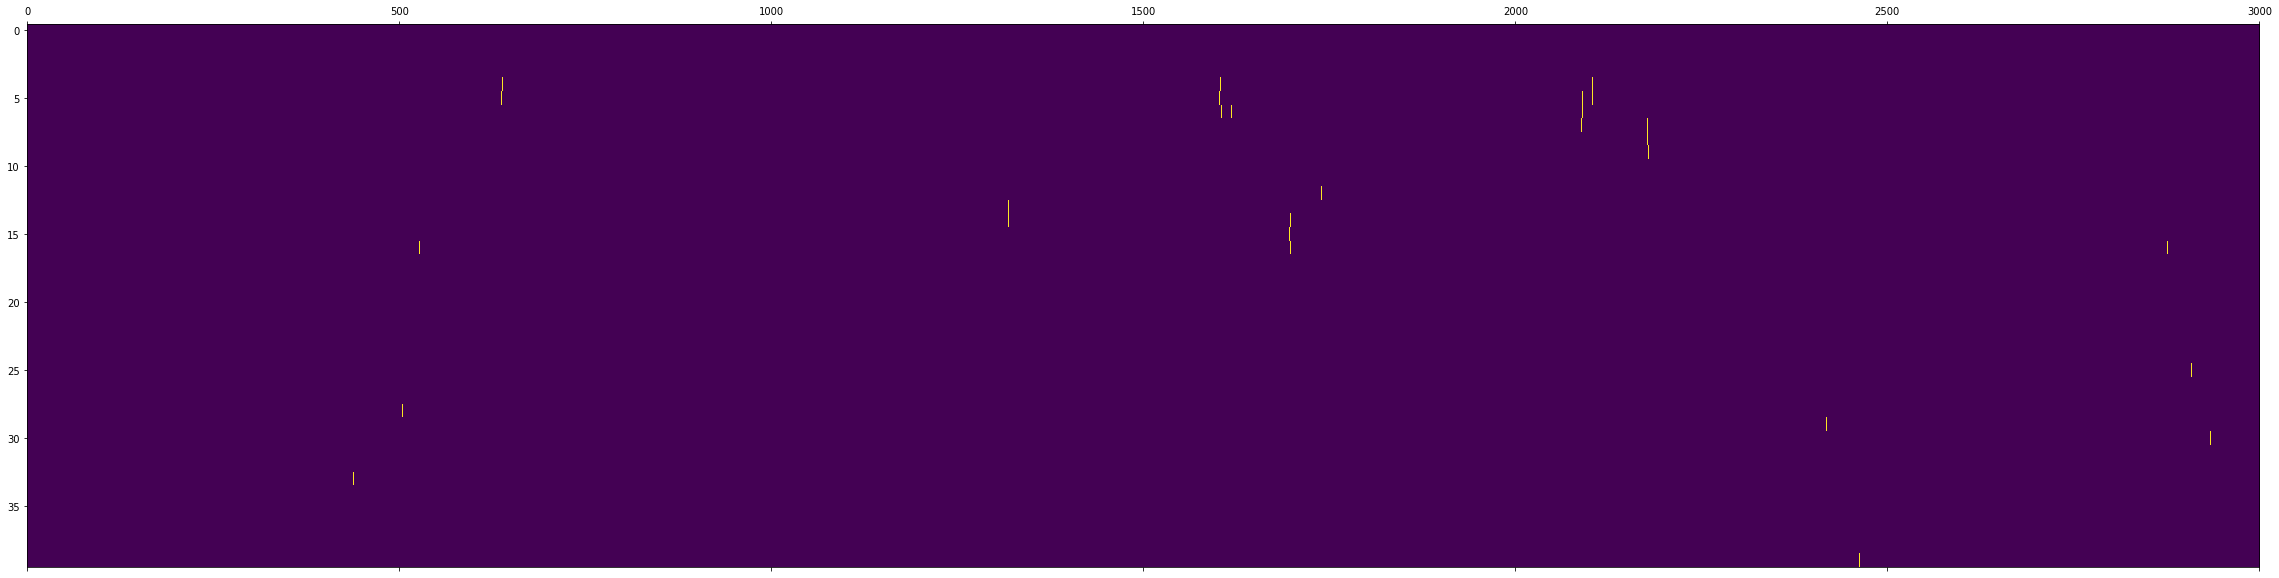

Firing rate:
mean:  0.349791666667
min:  0.0
max:  3.33333333333 



In [10]:
# Vp L23 exc: horizontal
layer = 'Vp_L23_horizontal'
pop = 'Vp_exc'

# V_m
variable='V_m'
activity = an_utils.load_activity(layer, pop, output_dir, variable=variable)
pl.show_layer_summary(activity, variable, layer, pop, plot_period=plot_period, rate_period=rate_period, plot_cols=None)
# Spikes
variable='spikes'
activity = an_utils.load_activity(layer, pop, output_dir, variable=variable)
pl.show_layer_summary(activity, variable, layer, pop, plot_period=plot_period, rate_period=rate_period, plot_cols=[0])

In [19]:
# Vp L56 exc: vertical
layer = 'Vp_L56_vertical'
pop = 'Vp_exc'

# Spikes
variable='spikes'
activity = an_utils.load_activity(layer, pop, output_dir, variable=variable)
pl.show_layer_summary(activity, variable, layer, pop, plot_period=plot_period, rate_period=rate_period, plot_cols=[0])

Activity raster plot:  spikes
Firing rate:
mean:  6.476875
min:  0.0
max:  37.6666666667 



## Figure

In [38]:
import importlib
importlib.reload(pl)

<module 'spiking_visnet.plot' from '/Users/Tom/Documents/projects/pinging/spiking_visnet/spiking_visnet/plot.py'>

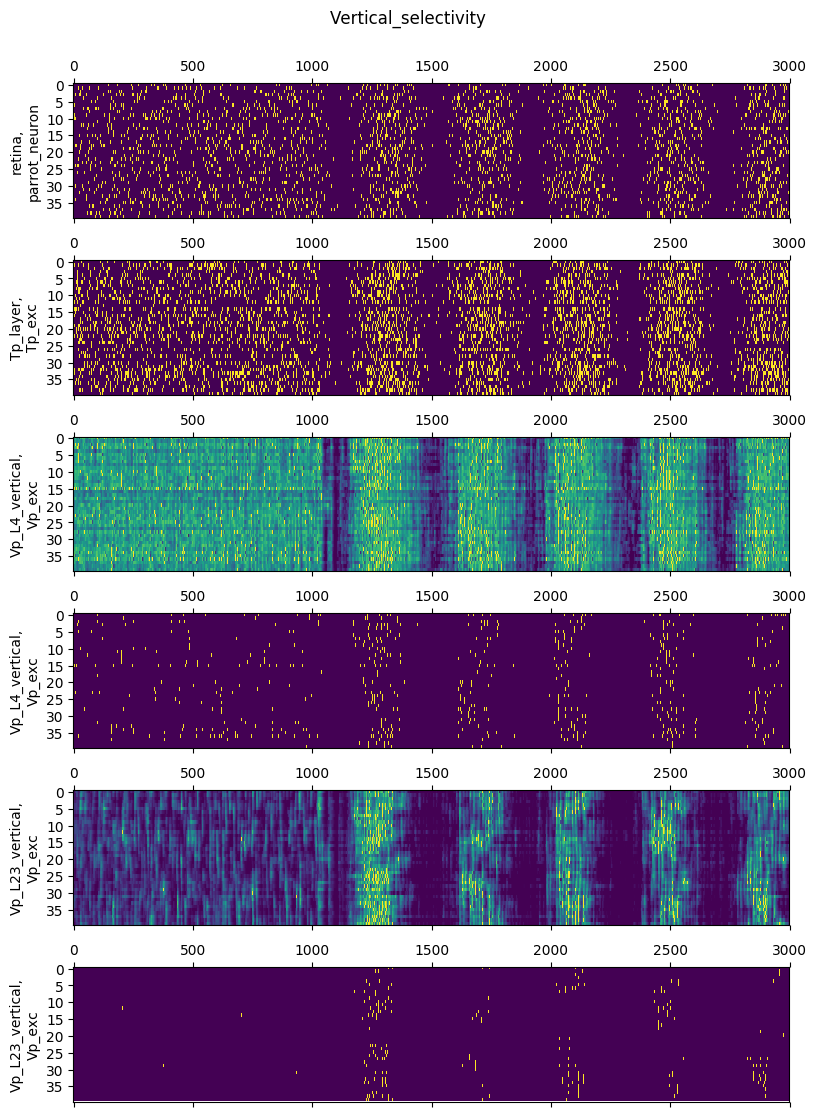

In [39]:
# Vertical

plotting_pops = [('retina', 'parrot_neuron', 'spikes'),
                 ('Tp_layer', 'Tp_exc', 'spikes'),
                 ('Vp_L4_vertical', 'Vp_exc', 'V_m'),
                 ('Vp_L4_vertical', 'Vp_exc', 'spikes'),
                 ('Vp_L23_vertical', 'Vp_exc', 'V_m'),
                 ('Vp_L23_vertical', 'Vp_exc', 'spikes')]
fig_title = 'Vertical_selectivity'

fig = pl.make_activity_figure(plotting_pops, plot_period, output_dir, fig_title=fig_title)

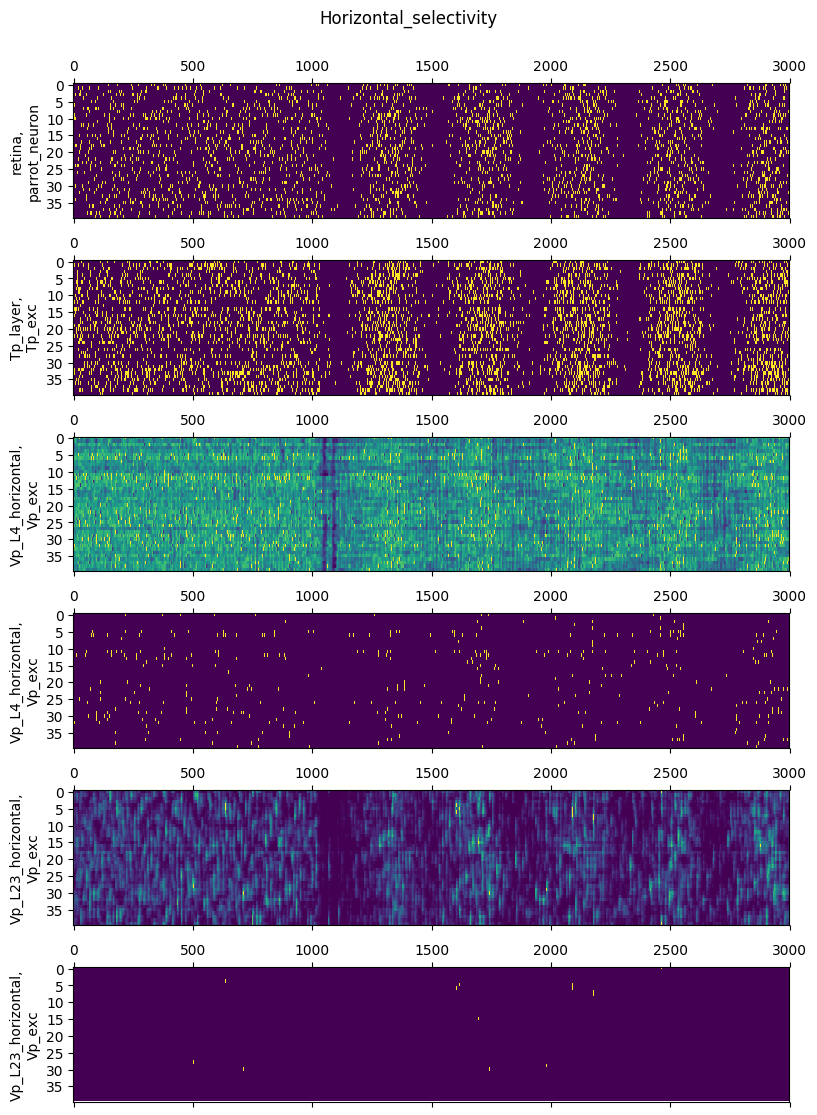

In [40]:
# horizontal

plotting_pops = [('retina', 'parrot_neuron', 'spikes'),
                 ('Tp_layer', 'Tp_exc', 'spikes'),
                 ('Vp_L4_horizontal', 'Vp_exc', 'V_m'),
                 ('Vp_L4_horizontal', 'Vp_exc', 'spikes'),
                 ('Vp_L23_horizontal', 'Vp_exc', 'V_m'),
                 ('Vp_L23_horizontal', 'Vp_exc', 'spikes')]
fig_title = 'Horizontal_selectivity'

fig = pl.make_activity_figure(plotting_pops, plot_period, output_dir, fig_title=fig_title)